In [1]:
!pip install openpyxl

     |████████████████████████████████| 242 kB 12.5 MB/s eta 0:00:01


In [4]:
!pip install seaborn

  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


In [41]:
!pip install statsmodels

     |████████████████████████████████| 9.1 MB 11.7 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 53.5 MB/s eta 0:00:01


In [42]:
import statsmodels.formula.api as smf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mlb = pd.read_excel('MLB2018.xlsx')

In [4]:
print(mlb.columns.tolist())

['Date', 'DoubleHeader', 'DayOfWeek', 'VisitingTeam', 'VisitingTeamLeague', 'VisitingTeamGameNumber', 'HomeTeam', 'HomeTeamLeague', 'HomeTeamGameNumber', 'VisitorRunsScored', 'HomeRunsScore', 'LengthInOuts', 'DayNight', 'CompletionInfo', 'ForfeitInfo', 'ProtestInfo', 'ParkID', 'Attendence', 'Duration', 'VisitorLineScore', 'HomeLineScore', 'VisitorAB', 'VisitorH', 'VisitorD', 'VisitorT', 'VisitorHR', 'VisitorRBI', 'VisitorSH', 'VisitorSF', 'VisitorHBP', 'VisitorBB', 'VisitorIBB', 'VisitorK', 'VisitorSB', 'VisitorCS', 'VisitorGDP', 'VisitorCI', 'VisitorLOB', 'VisitorPitchers', 'VisitorER', 'VisitorTER', 'VisitorWP', 'VisitorBalks', 'VisitorPO', 'VisitorA', 'VisitorE', 'VisitorPassed', 'VisitorDB', 'VisitorTP', 'HomeAB', 'HomeH', 'HomeD', 'HomeT', 'HomeHR', 'HomeRBI', 'HomeSH', 'HomeSF', 'HomeHBP', 'HomeBB', 'HomeIBB', 'HomeK', 'HomeSB', 'HomeCS', 'HomeGDP', 'HomeCI', 'HomeLOB', 'HomePitchers', 'HomeER', 'HomeTER', 'HomeWP', 'HomeBalks', 'HomePO', 'HomeA', 'HomeE', 'HomePassed', 'HomeDB',

In [5]:
mlb.head(n=5)

,Date,DoubleHeader,DayOfWeek,VisitingTeam,VisitingTeamLeague,VisitingTeamGameNumber,HomeTeam,HomeTeamLeague,HomeTeamGameNumber,VisitorRunsScored,...,HomeBatting7Name,HomeBatting7Position,HomeBatting8PlayerID,HomeBatting8Name,HomeBatting8Position,HomeBatting9PlayerID,HomeBatting9Name,HomeBatting9Position,AdditionalInfo,AcquisitionInfo
0,20180329,0,Thu,COL,NL,1,ARI,NL,1,2,...,Nick Ahmed,6,dysoj001,Jarrod Dyson,9,corbp001,Patrick Corbin,1,NaN,Y
1,20180329,0,Thu,PHI,NL,1,ATL,NL,1,5,...,Dansby Swanson,6,flahr001,Ryan Flaherty,5,tehej001,Julio Teheran,1,NaN,Y
2,20180329,0,Thu,SFN,NL,1,LAN,NL,1,1,...,Yasmani Grandal,2,forsl001,Logan Forsythe,5,kersc001,Clayton Kershaw,1,NaN,Y
3,20180329,0,Thu,CHN,NL,1,MIA,NL,1,8,...,Miguel Rojas,6,wallc001,Chad Wallach,2,urenj001,Jose Urena,1,NaN,Y
4,20180329,0,Thu,SLN,NL,1,NYN,NL,1,4,...,Kevin Plawecki,2,syndn001,Noah Syndergaard,1,rosaa003,Amed Rosario,6,NaN,Y


In [6]:
mlb18 = mlb[['VisitingTeam','HomeTeam', 'VisitorRunsScored','HomeRunsScore','Date']]

In [7]:
mlb18.head(n=5)

,VisitingTeam,HomeTeam,VisitorRunsScored,HomeRunsScore,Date
0,COL,ARI,2,8,20180329
1,PHI,ATL,5,8,20180329
2,SFN,LAN,1,0,20180329
3,CHN,MIA,8,4,20180329
4,SLN,NYN,4,9,20180329


In [8]:
mlb18 = mlb18.rename(columns={'VisitorRunsScored':'VisR','HomeRunsScore':'HomR'})

In [9]:
mlb18.head(n=5)

,VisitingTeam,HomeTeam,VisR,HomR,Date
0,COL,ARI,2,8,20180329
1,PHI,ATL,5,8,20180329
2,SFN,LAN,1,0,20180329
3,CHN,MIA,8,4,20180329
4,SLN,NYN,4,9,20180329


In [10]:
mlb18['hwin'] = 0

In [11]:
mlb18.head(n=5)

,VisitingTeam,HomeTeam,VisR,HomR,Date,hwin
0,COL,ARI,2,8,20180329,0
1,PHI,ATL,5,8,20180329,0
2,SFN,LAN,1,0,20180329,0
3,CHN,MIA,8,4,20180329,0
4,SLN,NYN,4,9,20180329,0


In [12]:
mlb18['hwin'] = 1

In [13]:
mlb18.head(n=5)

,VisitingTeam,HomeTeam,VisR,HomR,Date,hwin
0,COL,ARI,2,8,20180329,1
1,PHI,ATL,5,8,20180329,1
2,SFN,LAN,1,0,20180329,1
3,CHN,MIA,8,4,20180329,1
4,SLN,NYN,4,9,20180329,1


In [14]:
mlb18['hwin'] = np.where(mlb18['HomR'] > mlb18['VisR'],1,0)
mlb18['awin'] = np.where(mlb18['HomR'] < mlb18['VisR'],1,0)
mlb18['count'] = 1

In [15]:
mlb18.head(n=5)

,VisitingTeam,HomeTeam,VisR,HomR,Date,hwin,awin,count
0,COL,ARI,2,8,20180329,1,0,1
1,PHI,ATL,5,8,20180329,1,0,1
2,SFN,LAN,1,0,20180329,0,1,1
3,CHN,MIA,8,4,20180329,0,1,1
4,SLN,NYN,4,9,20180329,1,0,1


In [27]:
mlbhome = mlb18.groupby('HomeTeam')['hwin','HomR','VisR','count'].sum().reset_index()
mlbhome = mlbhome.rename(columns={'HomeTeam':'team','VisR':'VisRh','HomR':'HomRh','count':'Gh'})

/var/folders/dl/p7yynvfx1t71gxy40qg64jqr0000gn/T/ipykernel_31537/342732483.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mlbhome = mlb18.groupby('HomeTeam')['hwin','HomR','VisR','count'].sum().reset_index()


In [28]:
mlbhome

,team,hwin,HomRh,VisRh,Gh
0,ANA,42,355,355,81
1,ARI,40,359,328,81
2,ATL,43,391,357,81
3,BAL,28,339,411,81
4,BOS,57,468,322,81
5,CHA,30,321,409,81
6,CHN,51,385,349,82
7,CIN,37,385,418,81
8,CLE,49,443,334,81
9,COL,47,445,404,81


In [30]:
mlbhome['percentage'] = (mlbhome['HomRh']**2) / (mlbhome['HomRh']**2 + mlbhome['VisRh']**2)
mlbhome['predictedhwin'] = mlbhome['Gh'] * mlbhome['percentage']
mlbhome

,team,hwin,HomRh,VisRh,Gh,percentage,predictedhwin
0,ANA,42,355,355,81,0.500000,40.500000
1,ARI,40,359,328,81,0.545032,44.147595
2,ATL,43,391,357,81,0.545361,44.174227
3,BAL,28,339,411,81,0.404877,32.795009
4,BOS,57,468,322,81,0.678706,54.975222
5,CHA,30,321,409,81,0.381179,30.875478
6,CHN,51,385,349,82,0.548929,45.012147
7,CIN,37,385,418,81,0.458973,37.176845
8,CLE,49,443,334,81,0.637576,51.643635
9,COL,47,445,404,81,0.548180,44.402560


In [31]:
mlbaway = mlb18.groupby('VisitingTeam')['awin','HomR','VisR','count'].sum().reset_index()
mlbaway = mlbaway.rename(columns={'VisitingTeam':'team','VisR':'VisRa','HomR':'HomRa','count':'Ga'})
mlbaway

/var/folders/dl/p7yynvfx1t71gxy40qg64jqr0000gn/T/ipykernel_31537/2176696152.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mlbaway = mlb18.groupby('VisitingTeam')['awin','HomR','VisR','count'].sum().reset_index()


,team,awin,HomRa,VisRa,Ga
0,ANA,38,367,366,81
1,ARI,42,316,334,81
2,ATL,47,300,368,81
3,BAL,19,481,283,81
4,BOS,51,325,408,81
5,CHA,32,439,335,81
6,CHN,44,296,376,81
7,CIN,30,401,311,81
8,CLE,42,314,375,81
9,COL,44,341,335,82


In [32]:
MLB18 = pd.merge(mlbhome,mlbaway,on='team')
MLB18

,team,hwin,HomRh,VisRh,Gh,percentage,predictedhwin,awin,HomRa,VisRa,Ga
0,ANA,42,355,355,81,0.500000,40.500000,38,367,366,81
1,ARI,40,359,328,81,0.545032,44.147595,42,316,334,81
2,ATL,43,391,357,81,0.545361,44.174227,47,300,368,81
3,BAL,28,339,411,81,0.404877,32.795009,19,481,283,81
4,BOS,57,468,322,81,0.678706,54.975222,51,325,408,81
5,CHA,30,321,409,81,0.381179,30.875478,32,439,335,81
6,CHN,51,385,349,82,0.548929,45.012147,44,296,376,81
7,CIN,37,385,418,81,0.458973,37.176845,30,401,311,81
8,CLE,49,443,334,81,0.637576,51.643635,42,314,375,81
9,COL,47,445,404,81,0.548180,44.402560,44,341,335,82


In [33]:
MLB18['W']=MLB18['hwin']+MLB18['awin']
MLB18['G']=MLB18['Gh']+MLB18['Ga']
MLB18['R']=MLB18['HomRh']+MLB18['VisRa']
MLB18['RA']=MLB18['VisRh']+MLB18['HomRa']
MLB18

,team,hwin,HomRh,VisRh,Gh,percentage,predictedhwin,awin,HomRa,VisRa,Ga,W,G,R,RA
0,ANA,42,355,355,81,0.500000,40.500000,38,367,366,81,80,162,721,722
1,ARI,40,359,328,81,0.545032,44.147595,42,316,334,81,82,162,693,644
2,ATL,43,391,357,81,0.545361,44.174227,47,300,368,81,90,162,759,657
3,BAL,28,339,411,81,0.404877,32.795009,19,481,283,81,47,162,622,892
4,BOS,57,468,322,81,0.678706,54.975222,51,325,408,81,108,162,876,647
5,CHA,30,321,409,81,0.381179,30.875478,32,439,335,81,62,162,656,848
6,CHN,51,385,349,82,0.548929,45.012147,44,296,376,81,95,163,761,645
7,CIN,37,385,418,81,0.458973,37.176845,30,401,311,81,67,162,696,819
8,CLE,49,443,334,81,0.637576,51.643635,42,314,375,81,91,162,818,648
9,COL,47,445,404,81,0.548180,44.402560,44,341,335,82,91,163,780,745


In [34]:
MLB18['wpc'] = MLB18['W']/MLB18['G']
MLB18['pyth'] = MLB18['R']**2/(MLB18['R']**2 + MLB18['RA']**2)
MLB18

,team,hwin,HomRh,VisRh,Gh,percentage,predictedhwin,awin,HomRa,VisRa,Ga,W,G,R,RA,wpc,pyth
0,ANA,42,355,355,81,0.500000,40.500000,38,367,366,81,80,162,721,722,0.493827,0.499307
1,ARI,40,359,328,81,0.545032,44.147595,42,316,334,81,82,162,693,644,0.506173,0.536600
2,ATL,43,391,357,81,0.545361,44.174227,47,300,368,81,90,162,759,657,0.555556,0.571662
3,BAL,28,339,411,81,0.404877,32.795009,19,481,283,81,47,162,622,892,0.290123,0.327161
4,BOS,57,468,322,81,0.678706,54.975222,51,325,408,81,108,162,876,647,0.666667,0.647037
5,CHA,30,321,409,81,0.381179,30.875478,32,439,335,81,62,162,656,848,0.382716,0.374388
6,CHN,51,385,349,82,0.548929,45.012147,44,296,376,81,95,163,761,645,0.582822,0.581946
7,CIN,37,385,418,81,0.458973,37.176845,30,401,311,81,67,162,696,819,0.413580,0.419344
8,CLE,49,443,334,81,0.637576,51.643635,42,314,375,81,91,162,818,648,0.561728,0.614423
9,COL,47,445,404,81,0.548180,44.402560,44,341,335,82,91,163,780,745,0.558282,0.522939


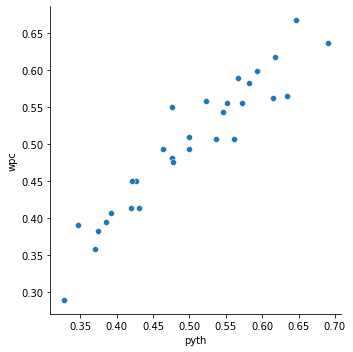

In [36]:
sns.relplot(x="pyth", y="wpc", data = MLB18)

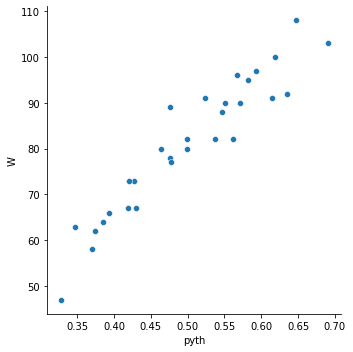

In [38]:
sns.relplot(x="pyth", y="W", data = MLB18)

In [43]:
# Finally we generate a regression.

pyth_lm = smf.ols(formula = 'wpc ~ pyth', data=MLB18).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     236.2
Date:                Sat, 30 Apr 2022   Prob (F-statistic):           3.54e-15
Time:                        01:29:42   Log-Likelihood:                 63.733
No. Observations:                  30   AIC:                            -123.5
Df Residuals:                      28   BIC:                            -120.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0609      0.029      2.093      0.046       0.001       0.120
pyth           0.8770      0.057     15.370      0.000       0.760       0.994
==============================================================================
Omnibus:                        0.145   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.930   Jarque-Bera (JB):                0.012
Skew:                          -0.009   Prob(JB):                        0.994
Kurtosis:                       2.905   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""